In [3]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

data = pd.read_csv('data.csv')
data

,Protocol,Length,label,Info
0,TCP,60,0,[TCP ACKed unseen segment] 80 > 41544 [ACK] ...
1,TCP,60,0,[TCP ACKed unseen segment] 80 > 41544 [ACK] ...
2,TCP,60,0,[TCP ACKed unseen segment] 80 > 44628 [ACK] ...
3,TCP,60,0,[TCP ACKed unseen segment] 80 > 44628 [ACK] ...
4,TCP,60,0,[TCP ACKed unseen segment] 80 > 50508 [ACK] ...
...,...,...,...,...
30845,ARP,42,0,Who has 192.168.126.2? Tell 192.168.126.142
30846,ARP,42,0,Who has 192.168.126.254? Tell 192.168.126.142
30847,ARP,42,0,Who has 192.168.126.254? Tell 192.168.126.142
30848,ARP,42,0,Who has 192.168.126.254? Tell 192.168.126.142


In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

2023-03-14 22:07:36.913448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import tensorflow as tf

In [5]:
# Encoding Protocol


data[['Protocol']] = data[['Protocol']].apply(lambda x: pd.factorize(x)[0])






data

,Protocol,Length,label,Info
0,0,60,0,[TCP ACKed unseen segment] 80 > 41544 [ACK] ...
1,0,60,0,[TCP ACKed unseen segment] 80 > 41544 [ACK] ...
2,0,60,0,[TCP ACKed unseen segment] 80 > 44628 [ACK] ...
3,0,60,0,[TCP ACKed unseen segment] 80 > 44628 [ACK] ...
4,0,60,0,[TCP ACKed unseen segment] 80 > 50508 [ACK] ...
...,...,...,...,...
30845,5,42,0,Who has 192.168.126.2? Tell 192.168.126.142
30846,5,42,0,Who has 192.168.126.254? Tell 192.168.126.142
30847,5,42,0,Who has 192.168.126.254? Tell 192.168.126.142
30848,5,42,0,Who has 192.168.126.254? Tell 192.168.126.142


In [4]:
data

,Protocol,Length,label,Info
0,TCP,60,0,[TCP ACKed unseen segment] 80 > 41544 [ACK] ...
1,TCP,60,0,[TCP ACKed unseen segment] 80 > 41544 [ACK] ...
2,TCP,60,0,[TCP ACKed unseen segment] 80 > 44628 [ACK] ...
3,TCP,60,0,[TCP ACKed unseen segment] 80 > 44628 [ACK] ...
4,TCP,60,0,[TCP ACKed unseen segment] 80 > 50508 [ACK] ...
...,...,...,...,...
30845,ARP,42,0,Who has 192.168.126.2? Tell 192.168.126.142
30846,ARP,42,0,Who has 192.168.126.254? Tell 192.168.126.142
30847,ARP,42,0,Who has 192.168.126.254? Tell 192.168.126.142
30848,ARP,42,0,Who has 192.168.126.254? Tell 192.168.126.142


In [6]:


# Load the data
#data = pd.read_csv("data.csv")

# Split the data into features and target
X = data.drop("label", axis=1)
y = data["label"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [21]:
X_train

,Protocol,Length,Info
29118,4,75,"Protected Payload (KP0), DCID=f973d8eaa15bc3c9"
15347,3,93,Application Data
23355,4,1399,"Protected Payload (KP0), DCID=697d12"
22,0,54,[TCP Dup ACK 14#5] 41544 > 80 [ACK] Seq=1 Ac...
26640,4,285,"Protected Payload (KP0), DCID=cd6200"
...,...,...,...
4869,0,60,443 > 54852 [ACK] Seq=3047498 Ack=135156 Win...
4208,0,60,443 > 54852 [ACK] Seq=1805289 Ack=58966 Win=...
10953,0,54,57464 > 443 [ACK] Seq=41388 Ack=14868326 Win...
6274,0,60,443 > 59706 [ACK] Seq=7263 Ack=768 Win=64240...


In [29]:
import keras
import tensorflow as tf
print(keras.__version__)

2.11.0


In [30]:
import tf.keras.utils.pad_sequences 

ModuleNotFoundError: No module named 'tf'

In [2]:
data

NameError: name 'data' is not defined

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# create example data
texts = data.Info

# create tokenizer
tokenizer = Tokenizer()

# fit tokenizer on data
tokenizer.fit_on_texts(texts)

# get number of words in vocabulary
num_words = len(tokenizer.word_index) + 1

# create sequences from texts
sequences = tokenizer.texts_to_sequences(texts)

# calculate maximum length of sequence
max_length = max([len(seq) for seq in sequences])

# initialize matrix for holding sequences
seq_matrix = np.zeros((len(sequences), max_length))

# fill matrix with sequences
for i, seq in enumerate(sequences):
    seq_matrix[i, :len(seq)] = seq
    
# print results
print('Vocabulary size:', num_words)
print('Sequences:\n', seq_matrix)


Vocabulary size: 13828
Sequences:
 [[ 14. 148. 149. ...   0.   0.   0.]
 [ 14. 148. 149. ...   0.   0.   0.]
 [ 14. 148. 149. ...   0.   0.   0.]
 ...
 [165. 166.  81. ...   0.   0.   0.]
 [165. 166.  81. ...   0.   0.   0.]
 [165. 166.  81. ...   0.   0.   0.]]


In [8]:
len(seq_matrix)

30850

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load data
df = pd.read_csv('data.csv')

# Preprocess data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Info'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = np.reshape(X_train.toarray(), (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.toarray(), (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


2023-03-16 19:35:58.736451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
772/772 [==============================] - 86s 102ms/step - loss: 0.0374 - accuracy: 0.9922 - val_loss: 1.5899e-04 - val_accuracy: 1.0000
Epoch 2/10
772/772 [==============================] - 78s 100ms/step - loss: 8.7746e-05 - accuracy: 1.0000 - val_loss: 3.3327e-05 - val_accuracy: 1.0000
Epoch 3/10
772/772 [==============================] - 81s 105ms/step - loss: 2.7132e-05 - accuracy: 1.0000 - val_loss: 1.3050e-05 - val_accuracy: 1.0000
Epoch 4/10
772/772 [==============================] - 82s 106ms/step - loss: 1.2696e-05 - accuracy: 1.0000 - val_loss: 6.5087e-06 - val_accuracy: 1.0000
Epoch 5/10
772/772 [==============================] - 76s 99ms/step - loss: 7.1160e-06 - accuracy: 1.0000 - val_loss: 3.6033e-06 - val_accuracy: 1.0000
Epoch 6/10
772/772 [==============================] - 76s 98ms/step - loss: 4.0949e-06 - accuracy: 1.0000 - val_loss: 2.2065e-06 - val_accuracy: 1.0000
Epoch 7/10
772/772 [==============================] - 76s 98ms/step - loss: 2.6778e-06 -

In [15]:
arr_2d = X_train.reshape(X_train.shape[0], -1)

In [ ]:
arr_2d

In [16]:
np.savetxt('my_array.csv', arr_2d, delimiter=',')

In [25]:


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
386/386 [==============================] - 3s 4ms/step - loss: 8.4088 - accuracy: 0.9149
Epoch 2/50
386/386 [==============================] - 1s 3ms/step - loss: 0.8236 - accuracy: 0.9549
Epoch 3/50
386/386 [==============================] - 1s 2ms/step - loss: 0.7203 - accuracy: 0.9624
Epoch 4/50
386/386 [==============================] - 1s 2ms/step - loss: 0.6566 - accuracy: 0.9655
Epoch 5/50
386/386 [==============================] - 1s 2ms/step - loss: 1.0982 - accuracy: 0.9642
Epoch 6/50
386/386 [==============================] - 1s 3ms/step - loss: 0.9244 - accuracy: 0.9718
Epoch 7/50
386/386 [==============================] - 1s 3ms/step - loss: 0.7261 - accuracy: 0.9717
Epoch 8/50
386/386 [==============================] - 1s 3ms/step - loss: 0.6581 - accuracy: 0.9716
Epoch 9/50
386/386 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.9734
Epoch 10/50
386/386 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.9730

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

random_forest_classifier.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = random_forest_classifier.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


Text(0.5, 1.0, 'Classification - Important Features')

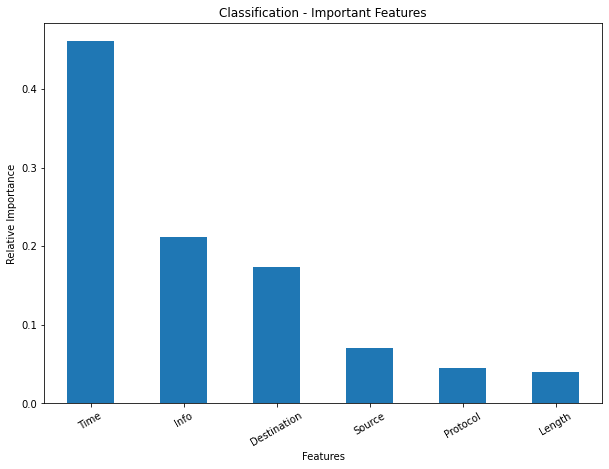

In [32]:
# view the feature scores

feature_scores = pd.Series(random_forest_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

feature_scores.nlargest(10).plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=30)
plt.ylabel("Relative Importance")
plt.xlabel("Features")
plt.title("Classification - Important Features")

In [7]:
pip install CICFlowMeter

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show CICFlowMeter

Name: cicflowmeter
Version: 0.1.6
Summary: CICFlowMeter V3 Python Implementation
Home-page: https://gitlab.com/hieulw/cicflowmeter
Author: Le Hieu
Author-email: hieulw99@gmail.com
License: MIT
Location: /usr/local/lib/python3.9/site-packages
Requires: numpy, scapy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
import sys
print(sys.path)

['/Users/asadtariq/Downloads/work_python/Python_work/maramkd random forest/Network Analysis', '/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/asadtariq/Library/Python/3.9/lib/python/site-packages', '/usr/local/lib/python3.9/site-packages', '/usr/local/opt/python-tk@3.9/libexec', '/path/to/CICFlowMeter']


In [4]:
import sys
sys.path.append("/path/to/CICFlowMeter")

In [8]:
from CICFlowMeter import cif


ModuleNotFoundError: No module named 'CICFlowMeter'